## **Data Science Project: Depression Data Exploration & Prediction Model**

#### **Description of The Project** 
The World Health Organization highlights depression as a global disability crisis, with universities becoming unexpected battlegrounds. Shockingly, 20-30% of students wrestle with depression's heavy weight—silenced by stigma, overwhelmed by academic pressures and life's turbulent transitions. These unseen battles not only dim academic potential but also erode the vibrant dreams of young minds, creating a hidden epidemic that demands compassionate understanding and urgent intervention.

**The aim** of this end-to-end Data Science and Machine Learning project is to develop a transformative depression prediction model that identifies students at risk of depression early and facilitates timely interventions. Leveraging data exploration techniques, I also aim to deeply analyze and study the underlying factors contributing to depression, such as academic stress, financial stress, and others.

**The ultimate goal** is to provide a scalable and impactful solution that can be implemented in educational institutions to monitor student mental health and in campus healthcare facilities to integrate mental health screening into their processes. By combining technology with mental health care, this project aspires to alleviate the growing burden of depression and improve student well-being.
    
For this project, I will be utilizing the Student Depression Dataset from Kaggle as the primary database. This dataset contains detailed information about students, including features such as academic pressure, sleep patterns, dietary habits, study hours, financial stress, and family history of mental illness, among others, along with the target variable indicating presence of depression.

### Part 1: Upload and Check out the Dataset

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import VarianceThreshold

In [9]:
depression_df = pd.read_csv('Depression Student Dataset.csv')
depression_df.head(3)

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28.0,2,4,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28.0,4,5,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25.0,1,3,5-6 hours,Unhealthy,Yes,10,4,No,Yes


In [11]:
depression_df.shape

(502, 11)

In [13]:
depression_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    501 non-null    float64
 2   Academic Pressure                      502 non-null    int64  
 3   Study Satisfaction                     502 non-null    int64  
 4   Sleep Duration                         501 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [17]:
depression_df.describe()

,Age,Academic Pressure,Study Satisfaction,Study Hours,Financial Stress
count,501.000000,502.000000,502.000000,502.000000,502.000000
mean,26.241517,3.003984,3.075697,6.404382,2.928287
std,4.901383,1.390007,1.373490,3.742434,1.425053
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,22.000000,2.000000,2.000000,3.000000,2.000000
50%,27.000000,3.000000,3.000000,7.000000,3.000000
75%,30.000000,4.000000,4.000000,10.000000,4.000000
max,34.000000,5.000000,5.000000,12.000000,5.000000


### Part 2: Cleaning the Data

In [19]:
#making a copy of the dataset in case the current one gets mismanaged
df = depression_df
df.head(2)

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28.0,2,4,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28.0,4,5,5-6 hours,Healthy,Yes,7,1,Yes,No


In [21]:
#checking for and handling missing values
depression_df.isnull().sum()

Gender                                   0
Age                                      1
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           1
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [23]:
#checking for outliers
summary = pd.DataFrame(depression_df['Age'].describe())
summary

,Age
count,501.000000
mean,26.241517
std,4.901383
min,18.000000
25%,22.000000
50%,27.000000
75%,30.000000
max,34.000000


In [25]:
new_index = ['count','mean','std','min','Q1','Median','Q3','max']
summary.index = new_index

In [27]:
summary

,Age
count,501.000000
mean,26.241517
std,4.901383
min,18.000000
Q1,22.000000
Median,27.000000
Q3,30.000000
max,34.000000


In [29]:
IQR = (summary['Age']['Q3']) - (summary['Age']['Q1'])
IQR

8.0

In [31]:
lower_fence = (summary['Age']['Q1']) - 1.5*IQR
higher_fence = (summary['Age']['Q3']) + 1.5*IQR
print('Lower Fence: ', lower_fence)
print('Higher Fence: ', higher_fence)

Lower Fence:  10.0
Higher Fence:  42.0


##### Outliers are numbers higher than higher fence or lower than lower fence
##### since minimum is not lower than lower fence and maximum is not higher than higher fence, there are no outliers in our dataset Age column
##### Therefore we can use Mean Value Imputation to handle missing values in the age column

<Axes: ylabel='Age'>

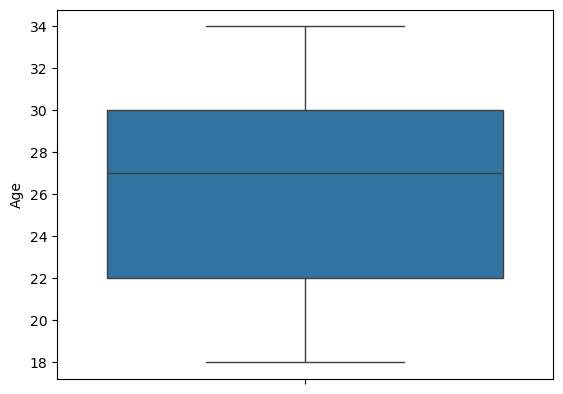

In [33]:
#boxplot to visualize outliers
sns.boxplot(depression_df['Age'])

In [35]:
depression_df['Age'] = depression_df['Age'].fillna(depression_df['Age'].mean())

In [37]:
depression_df.isnull().sum()

Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           1
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [39]:
# Sleep duration is a categorical variable so Median Value imputation is used to handle the missing values
depression_df['Sleep Duration'] = depression_df['Sleep Duration'].fillna(depression_df['Sleep Duration'].mode()[0])

In [41]:
depression_df.isnull().sum()

Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [43]:
#checking for and handling duplicated rows
depression_df[depression_df.duplicated()]

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression


##### No duplicates found

In [45]:
#checking imbalanced dataset
depression_df['Depression'].value_counts()

Depression
Yes    252
No     250
Name: count, dtype: int64

##### The Dataset is not imbalanced therefore upsampling and downsampling will not be required

In [47]:
#updating the dataset copy df as I will be using it for other purposes
df = depression_df

In [130]:
#checking for value inconsistencies
depression_df.columns

Index(['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [49]:
depression_df['Gender'].value_counts()

Gender
Male      267
Female    235
Name: count, dtype: int64

In [51]:
depression_df['Sleep Duration'].value_counts()

Sleep Duration
More than 8 hours    129
7-8 hours            127
5-6 hours            123
Less than 5 hours    123
Name: count, dtype: int64

In [53]:
depression_df['Dietary Habits'].value_counts()

Dietary Habits
Moderate     172
Unhealthy    169
Healthy      161
Name: count, dtype: int64

In [55]:
depression_df['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
Yes    260
No     242
Name: count, dtype: int64

In [57]:
depression_df['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     265
Yes    237
Name: count, dtype: int64

In [59]:
depression_df['Depression'].value_counts()

Depression
Yes    252
No     250
Name: count, dtype: int64

##### It seems there are no value inconsistency caused by spelling erros or white space so no action required

In [61]:
depression_df.head(3)

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28.0,2,4,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28.0,4,5,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25.0,1,3,5-6 hours,Unhealthy,Yes,10,4,No,Yes


In [63]:
#Encoding Ordinal categorical variables
from sklearn.preprocessing import OrdinalEncoder
diet_habits_encoder = OrdinalEncoder(categories = [['Unhealthy', 'Moderate', 'Healthy']])
depression_df['Dietary Habits'] = diet_habits_encoder.fit_transform(depression_df[['Dietary Habits']])
depression_df.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28.0,2,4,7-8 hours,1.0,Yes,9,2,Yes,No
1,Male,28.0,4,5,5-6 hours,2.0,Yes,7,1,Yes,No
2,Male,25.0,1,3,5-6 hours,0.0,Yes,10,4,No,Yes
3,Male,23.0,1,4,More than 8 hours,0.0,Yes,7,2,Yes,No
4,Female,31.0,1,5,More than 8 hours,2.0,Yes,4,2,Yes,No


In [65]:
#Encoding Ordinal categorical variables
sleep_duration_encoder = OrdinalEncoder(categories = [['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']])
depression_df['Sleep Duration'] = sleep_duration_encoder.fit_transform(depression_df[['Sleep Duration']])
depression_df.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28.0,2,4,2.0,1.0,Yes,9,2,Yes,No
1,Male,28.0,4,5,1.0,2.0,Yes,7,1,Yes,No
2,Male,25.0,1,3,1.0,0.0,Yes,10,4,No,Yes
3,Male,23.0,1,4,3.0,0.0,Yes,7,2,Yes,No
4,Female,31.0,1,5,3.0,2.0,Yes,4,2,Yes,No


In [67]:
depression_df.columns

Index(['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [69]:
#Encoding nominal categorical variables
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cols_to_encode = ['Gender', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']
for column in cols_to_encode:
    depression_df[column] = encoder.fit_transform(depression_df[column])

In [71]:
depression_df.head(3)

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,28.0,2,4,2.0,1.0,1,9,2,1,0
1,1,28.0,4,5,1.0,2.0,1,7,1,1,0
2,1,25.0,1,3,1.0,0.0,1,10,4,0,1


### Part 3: EDA

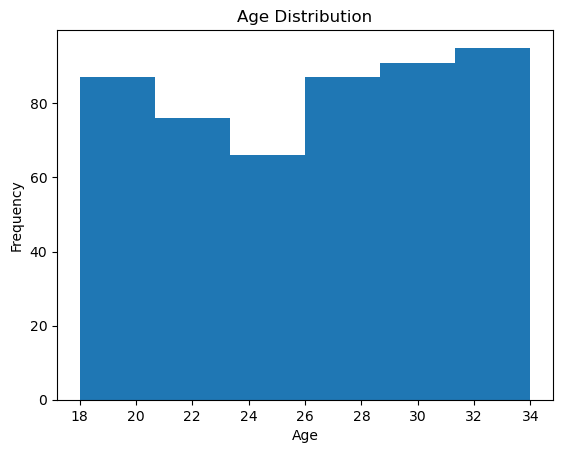

In [73]:
depression_df['Age'].plot(kind='hist', bins=6, title='Age Distribution')
plt.xlabel('Age')
plt.show()

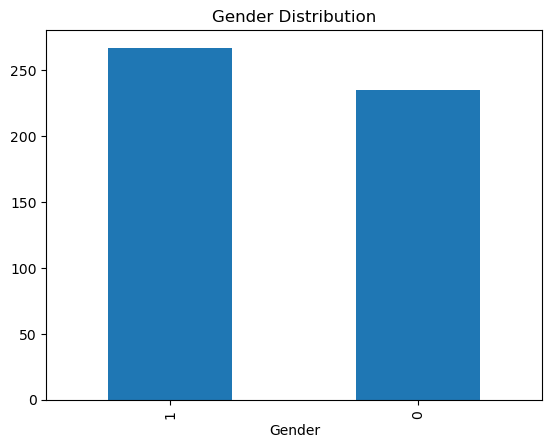

In [75]:
depression_df['Gender'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.show()

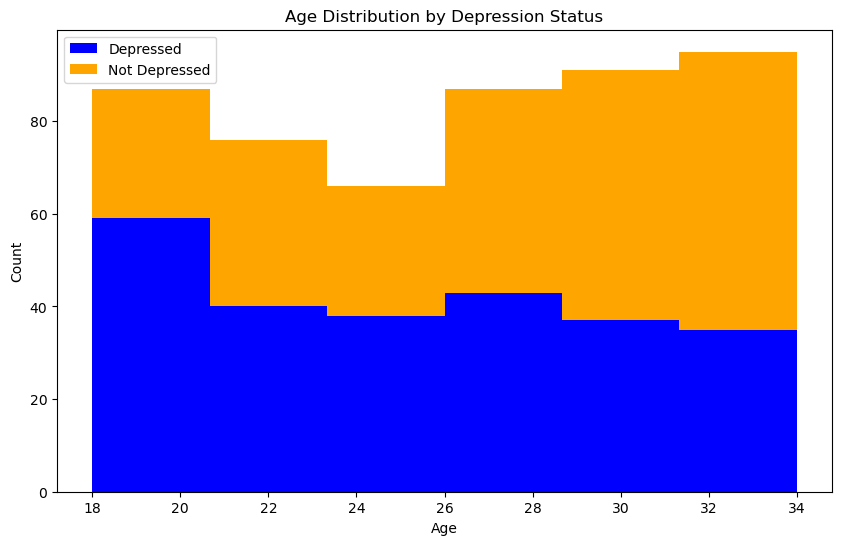

In [77]:
plt.figure(figsize=(10, 6))
depression_yes = df[df['Depression'] == 1]['Age']
depression_no = df[df['Depression'] == 0]['Age']

plt.hist(
    [depression_yes, depression_no],
    bins=6,
    stacked=True,
    color=['blue', 'orange'],
    label=['Depressed', 'Not Depressed']
)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Depression Status')
plt.legend()
plt.show()

##### The younger students seem to be more prone to depression compared to the older ones

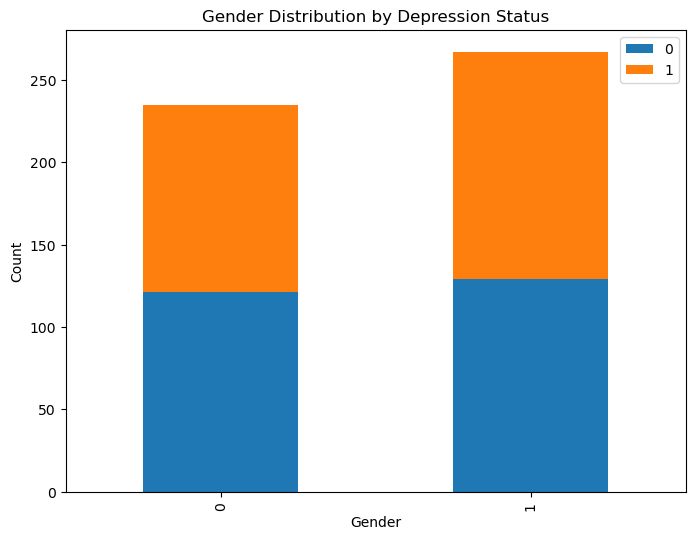

In [79]:
gender_depression = depression_df.groupby(['Gender', 'Depression']).size().unstack()
gender_depression.plot(kind='bar', stacked=True, figsize=(8, 6), title='Gender Distribution by Depression Status')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()
plt.show()

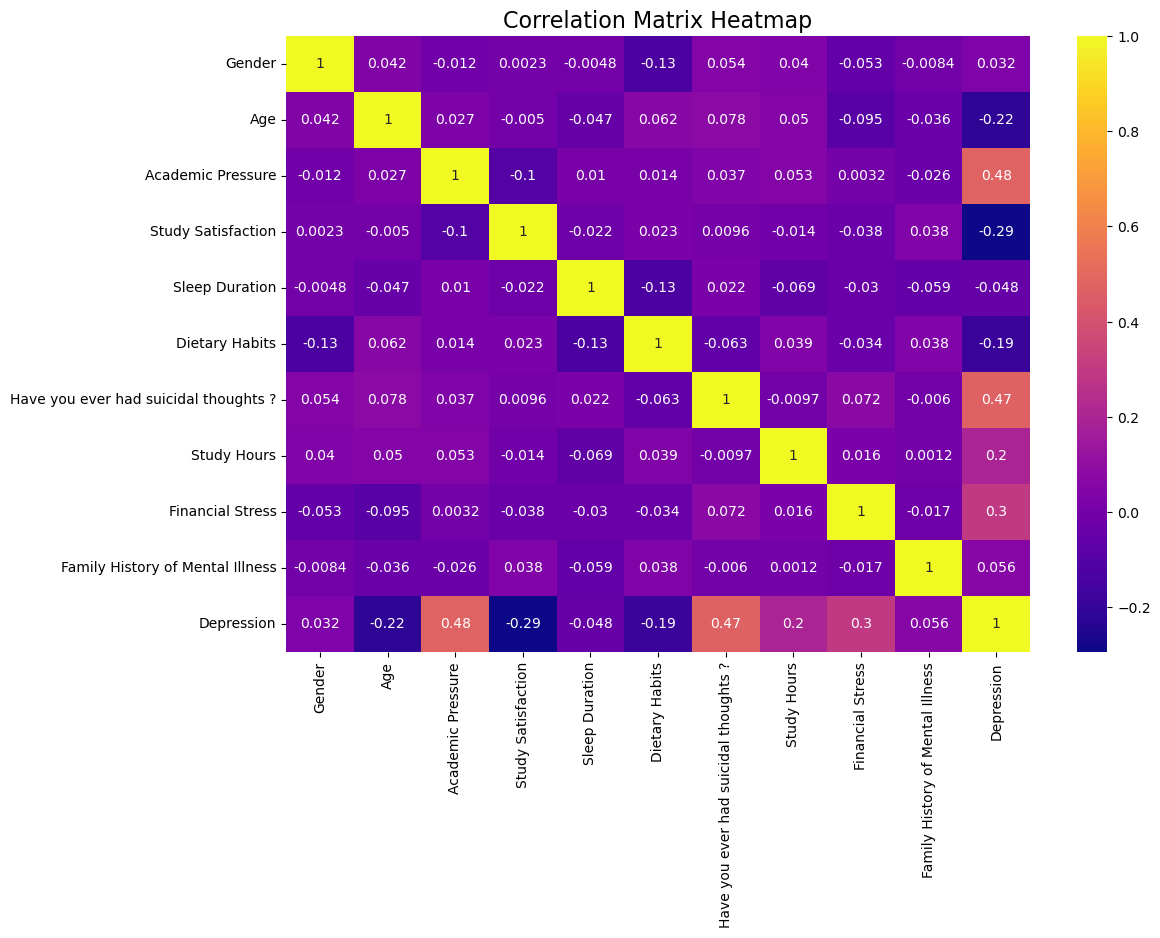

In [81]:
import seaborn as sns 
corr_matrix = depression_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='plasma')
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

##### There's no multicolinearity in this dataset, which implies that the model to be build will likely be more reliability, with high interpretability, and good performance. 



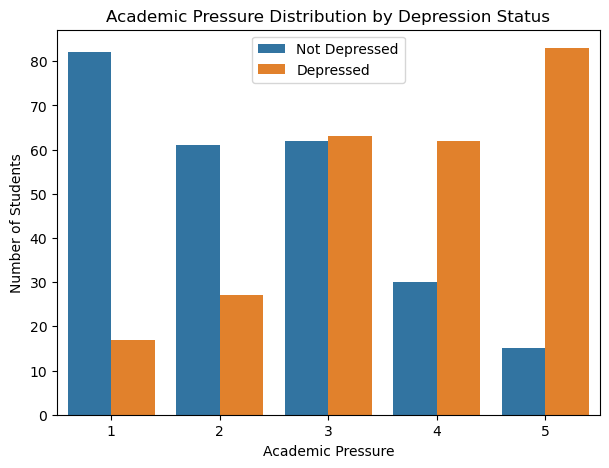

In [85]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Academic Pressure', hue='Depression', data=depression_df)
plt.title('Academic Pressure Distribution by Depression Status')
plt.xlabel('Academic Pressure')
plt.ylabel('Number of Students')
plt.legend(labels=['Not Depressed', 'Depressed'])
plt.show()

##### When academic pressure increases, depression also increases

<Figure size 800x600 with 0 Axes>

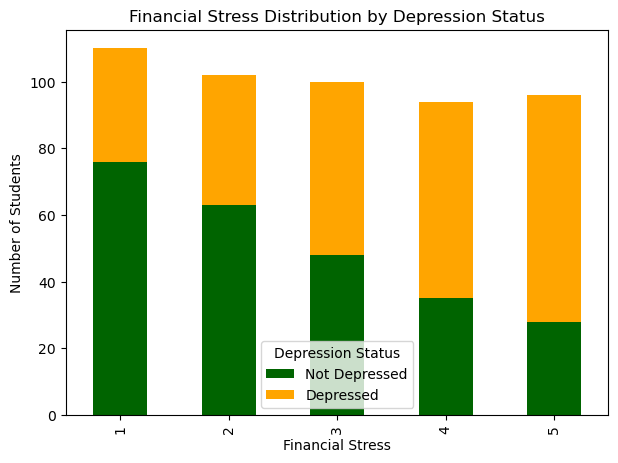

In [89]:
grouped_data = depression_df.groupby(['Financial Stress', 'Depression']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar', stacked=True, figsize=(7, 5), color=['darkgreen', 'orange'])

plt.title('Financial Stress Distribution by Depression Status')
plt.xlabel('Financial Stress')
plt.ylabel('Number of Students')
plt.legend(title='Depression Status', labels=['Not Depressed', 'Depressed'])
plt.show()

##### When financial stress increases, depression also increases

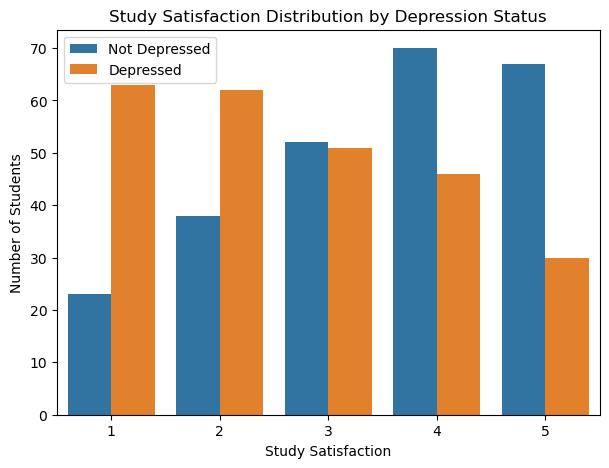

In [91]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Study Satisfaction', hue='Depression', data=depression_df)
plt.title('Study Satisfaction Distribution by Depression Status')
plt.xlabel('Study Satisfaction')
plt.ylabel('Number of Students')
plt.legend(labels=['Not Depressed', 'Depressed'])
plt.show()

##### When study satisfaction increases, depression decreases

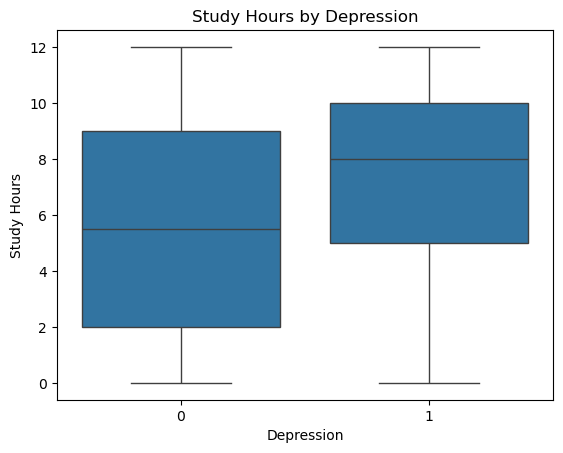

In [93]:
sns.boxplot(x='Depression', y='Study Hours', data=depression_df)
plt.title('Study Hours by Depression')
plt.show()

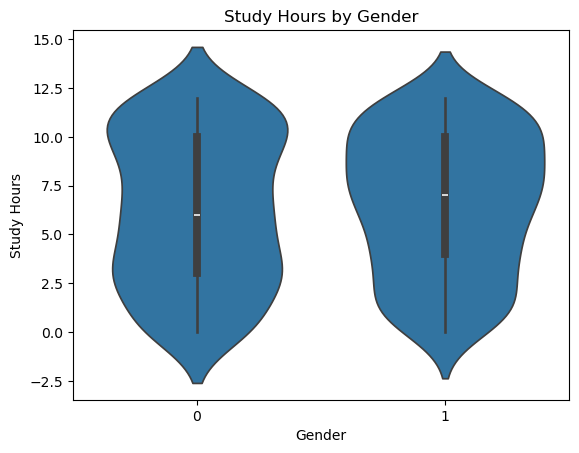

In [95]:
sns.violinplot(x='Gender', y='Study Hours', data=depression_df)
plt.title('Study Hours by Gender')
plt.show()

### Part 4: Dataset Splitting, Scaling, and Feature Selection

In [97]:
depression_df.head(2)

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,28.0,2,4,2.0,1.0,1,9,2,1,0
1,1,28.0,4,5,1.0,2.0,1,7,1,1,0


In [99]:
# defining indepenndent variables (X) and dependent variable (y)
X = depression_df.drop('Depression', axis=1)
y = depression_df['Depression']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [109]:
X_train.shape

(376, 10)

In [111]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [253]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [113]:
rf_model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rf_model, n_features_to_select = 7)
X_train_selected = rfe.fit_transform(X_train_scaled, y_train)
X_test_selected = rfe.transform(X_test_scaled)

In [119]:
selected_features = X.columns[rfe.support_]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Age', 'Academic Pressure', 'Study Satisfaction', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress'],
      dtype='object')


In [197]:
X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features, index=X_train.index)
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features, index=X_test.index)

In [205]:
X_train_selected.head(2)

,Age,Academic Pressure,Study Satisfaction,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress
426,0.180002,0.732791,-0.799713,-1.178741,-1.005333,-1.174805,0.752007
204,-0.426533,-0.687463,-0.799713,1.256460,-1.005333,0.711764,-0.661766


### Part 5: Model Training

In [209]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_selected, y_train)
logreg_pred = logreg.predict(X_test_selected)

rf = RandomForestClassifier()
rf.fit(X_train_selected, y_train)
rf_pred = rf.predict(X_test_selected)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_selected, y_train)
knn_pred = knn.predict(X_test_selected)

svm = SVC(kernel='linear', C=1)
svm.fit(X_train_selected, y_train)
svm_pred = svm.predict(X_test_selected)

dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train_selected, y_train)
dtree_pred = dtree.predict(X_test_selected)

gnb = GaussianNB()
gnb.fit(X_train_selected, y_train)
gbn_pred = gnb.predict(X_test_selected)

### Part 6: Model Evaluation

In [211]:
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred)
print(f"Logistic Regression Accuracy = {logreg_accuracy}, Precision = {logreg_precision}, Recall = {logreg_recall}, F1 = {logreg_f1}")
print('\n')

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
print(f"Random Forest Accuracy = {rf_accuracy}, Precision = {rf_precision}, Recall = {rf_recall}, F1 = {rf_f1}")
print('\n')

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
print(f"K Nearest Neighbors Accuracy = {knn_accuracy}, Precision = {knn_precision}, Recall = {knn_recall}, F1 = {knn_f1}")
print('\n')

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
print(f"Support vector Machine Accuracy = {svm_accuracy}, Precision = {svm_precision}, Recall = {svm_recall}, F1 = {svm_f1}")
print('\n')

dtree_accuracy = accuracy_score(y_test, dtree_pred)
dtree_precision = precision_score(y_test, dtree_pred)
dtree_recall = recall_score(y_test, dtree_pred)
dtree_f1 = f1_score(y_test, dtree_pred)
print(f"Decision Tree Accuracy = {dtree_accuracy}, Precision = {dtree_precision}, Recall = {dtree_recall}, F1 = {dtree_f1}")
print('\n')


gbn_accuracy = accuracy_score(y_test, gbn_pred)
gbn_precision = precision_score(y_test, gbn_pred)
gbn_recall = recall_score(y_test, gbn_pred)
gbn_f1 = f1_score(y_test, gbn_pred)
print(f"Naive Bayes Accuracy = {gbn_accuracy}, Precision = {gbn_precision}, Recall = {gbn_recall}, F1 = {gbn_f1}")
print('\n')

Logistic Regression Accuracy = 0.9682539682539683, Precision = 0.9701492537313433, Recall = 0.9701492537313433, F1 = 0.9701492537313433


Random Forest Accuracy = 0.9126984126984127, Precision = 0.9242424242424242, Recall = 0.9104477611940298, F1 = 0.9172932330827067


K Nearest Neighbors Accuracy = 0.9047619047619048, Precision = 0.9230769230769231, Recall = 0.8955223880597015, F1 = 0.9090909090909091


Support vector Machine Accuracy = 0.9523809523809523, Precision = 0.9692307692307692, Recall = 0.9402985074626866, F1 = 0.9545454545454546


Decision Tree Accuracy = 0.8253968253968254, Precision = 0.7922077922077922, Recall = 0.9104477611940298, F1 = 0.8472222222222222


Naive Bayes Accuracy = 0.9444444444444444, Precision = 0.9545454545454546, Recall = 0.9402985074626866, F1 = 0.9473684210526315




### Part 7: Cross Validation 

In [213]:
# K-fold Cross-Validation 
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, X_train_selected, y_train, cv=4, scoring='f1')

print("Cross-Validation F1 Scores for Logistic Regression:", cv_scores)
print("Mean F1 Score:", np.mean(cv_scores))
print("Standard Deviation of F1 Scores:", np.std(cv_scores))

Cross-Validation F1 Scores for Logistic Regression: [0.93478261 0.93478261 0.96703297 0.97826087]
Mean F1 Score: 0.9537147634973722
Standard Deviation of F1 Scores: 0.01934385457569158


In [215]:
# Using Stratified K-Folds to ensure class balance in each fold (applicable to classification problems like this one)
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
skf_cv_scores = cross_val_score (logreg, X_train_selected, y_train, cv=skf, scoring='f1')

print("Stratified Cross-Validation F1 Scores:", skf_cv_scores)
print("Mean F1 Score:", np.mean(skf_cv_scores))
print("Standard Deviation of F1 Scores:", np.std(skf_cv_scores))

Stratified Cross-Validation F1 Scores: [0.93478261 0.96703297 1.         0.91304348]
Mean F1 Score: 0.9537147634973723
Standard Deviation of F1 Scores: 0.03291001971947514



    
##### With a Mean F1 score above 95% and a very low Standard deviation of 0.0329, the  model's performance can be interpreted as reliable and stable across different subsets of the data.
##### This can also mean that there's no significant overfitting to specific folds, and that the model generalizes well within the training data.

### Part 8: Hyperparameter Tuning & Testing the Final Model

In [217]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(logreg, param_grid, cv=4, scoring='f1')
grid_search.fit(X_train_selected, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [219]:
from sklearn.metrics import classification_report, roc_auc_score

y_test_pred = best_model.predict(X_test_selected)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

y_test_probabilities = best_model.predict_proba(X_test_selected)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_test_probabilities))

Logistic Regression Accuracy: 0.9682539682539683
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        59
           1       0.97      0.97      0.97        67

    accuracy                           0.97       126
   macro avg       0.97      0.97      0.97       126
weighted avg       0.97      0.97      0.97       126

ROC-AUC Score: 0.9939286617758665


##### The model is excellent at distinguishing between students with and without depression, with Accuracy sccore of approximately 0.97 and an AUC score of 0.99

### Part 9: Visualizing Feature Importance

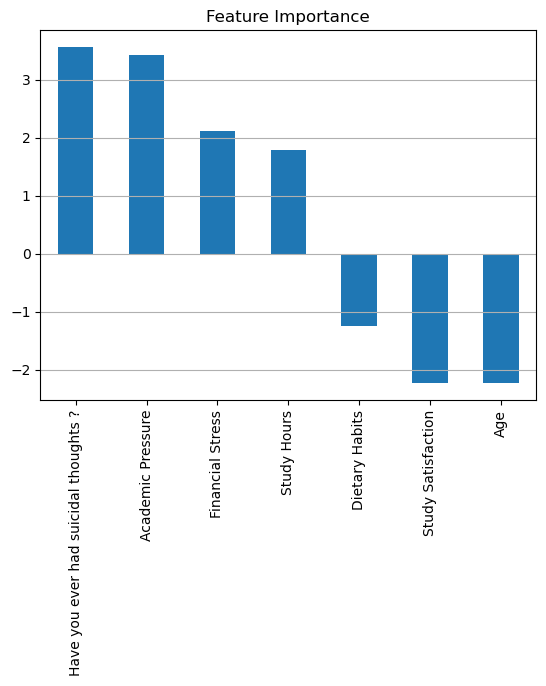

In [171]:
feature_importance = pd.Series(best_model.coef_[0], index=selected_features).sort_values(ascending=False)
feature_importance.plot(kind='bar', title='Feature Importance')
plt.grid(axis='y')
plt.show()

##### This Model is has been tested and proven to be a good depression predictor. It can be used to screen depression among student to ensure they receive timely ppreventive and/or therapeutic interventions.

### Part 10: Saving The Model

In [221]:
print(selected_features)

Index(['Age', 'Academic Pressure', 'Study Satisfaction', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress'],
      dtype='object')


In [224]:
#saving my training and testing dataset to csv
X_train_selected.to_csv('X_train_selected.csv', index=False)
X_test_selected.to_csv('X_test_selected.csv', index=False)

In [226]:
import json
selected_features_list = selected_features.tolist()

with open("selected_features.json", "w") as f:
    json.dump(selected_features_list, f)

In [228]:
import joblib

joblib.dump(best_model, "student_depression_predicting_model.pkl")

['student_depression_predicting_model.pkl']

### Part 11: Model Deployment 

##### The model is deployed on streamlit using the saved dataset below


In [258]:
#This is the same as the cleaned and encoded original dataset
df.head(2)

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,28.0,2,4,2.0,1.0,1,9,2,1,0
1,1,28.0,4,5,1.0,2.0,1,7,1,1,0


In [260]:
#Removing unnecessary columns to leave only the columns that were selected as selected features using RFE in the steps above 
df.drop(columns=['Gender', 'Sleep Duration', 'Family History of Mental Illness'], inplace=True)
df.head()

,Age,Academic Pressure,Study Satisfaction,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Depression
0,28.0,2,4,1.0,1,9,2,0
1,28.0,4,5,2.0,1,7,1,0
2,25.0,1,3,0.0,1,10,4,1
3,23.0,1,4,0.0,1,7,2,0
4,31.0,1,5,2.0,1,4,2,0


In [268]:
# saving the dataset for use while building streamlit app for depression prediction
df.to_csv('selected_depression_cols_df.csv', index=False)